# __Case Study On UPI Payment Analysis__#
### Team 19:
    Chaytali Jawalekar -    21bcs026
    Adi Jain           -    21bcs003
    Ekansh Thakur      -    21bcs037
    Deepika Talawar    -    21bcs030


# __UNIT 2__



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving UPI.csv to UPI.csv
Saving UPI_21.csv to UPI_21.csv
Saving UPI_22.csv to UPI_22.csv


In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import math
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
df = pd.read_csv("/content/UPI.csv")
df.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,8.53,"2,047.45",13.22,"4,729.77",1,2022
1,Airtel Payments Bank Apps,5.8,"1,199.46",7.58,"2,210.17",2,2022
2,Airtel Payments Bank Apps,8.33,"1,934.41",13.16,"4,492.25",3,2022
3,Airtel Payments Bank Apps,5.29,454.64,5.3,460.9,4,2022
4,Airtel Payments Bank Apps,6.1,486.55,6.11,486.62,5,2022


In [ ]:
columns = ["banks", "Vol_Cstm", "Val_Cstm", "Vol_Mn", "Val_Mn", "Month", "Year"]
df.columns = columns
df['Val_Cstm'] = pd.to_numeric(df['Val_Cstm'], errors='coerce')
df['month'] = df['Month'].apply(lambda x: 0 if 1 <= x <= 6 else 1)

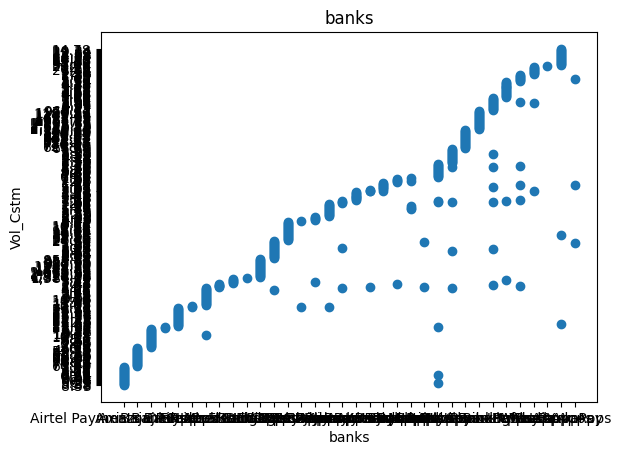

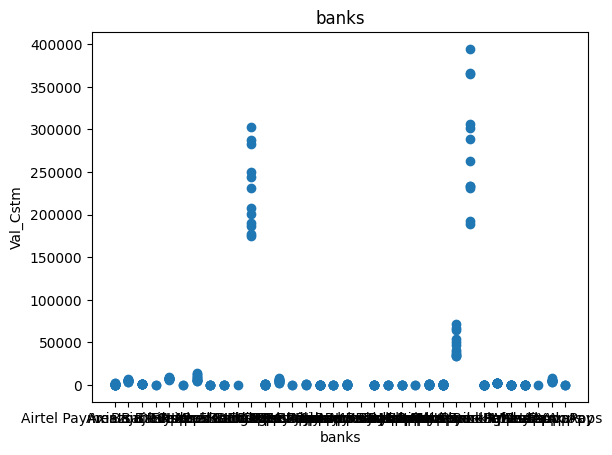

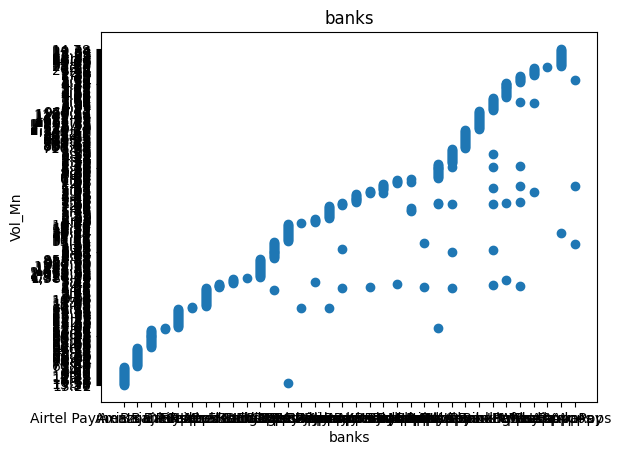

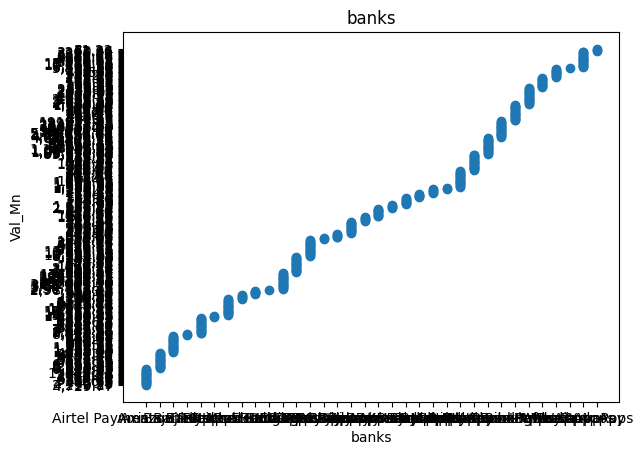

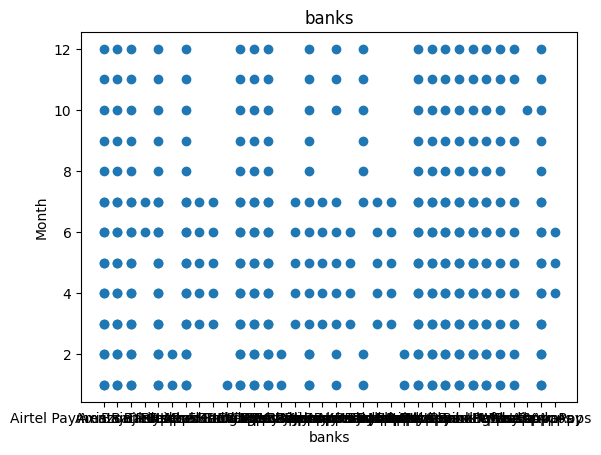

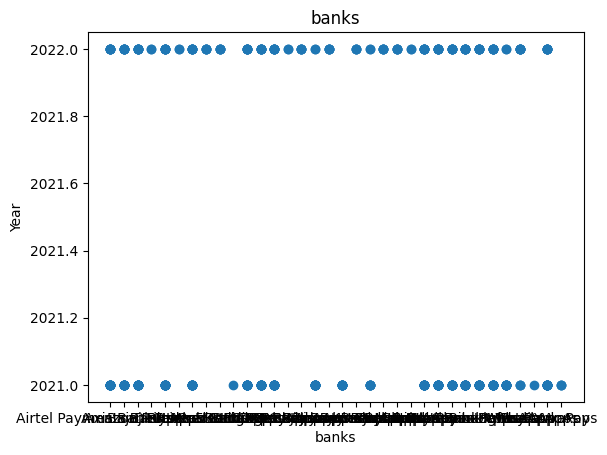

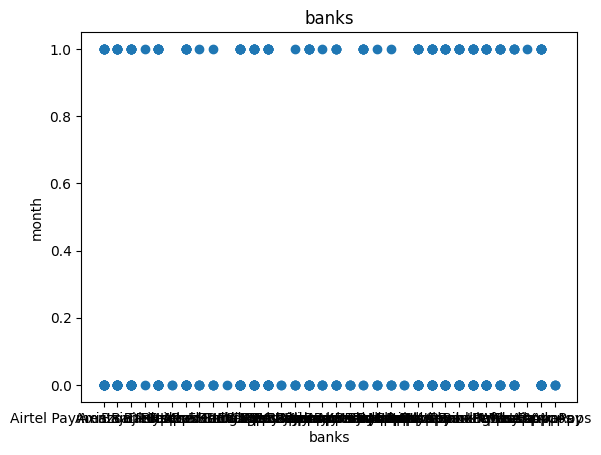

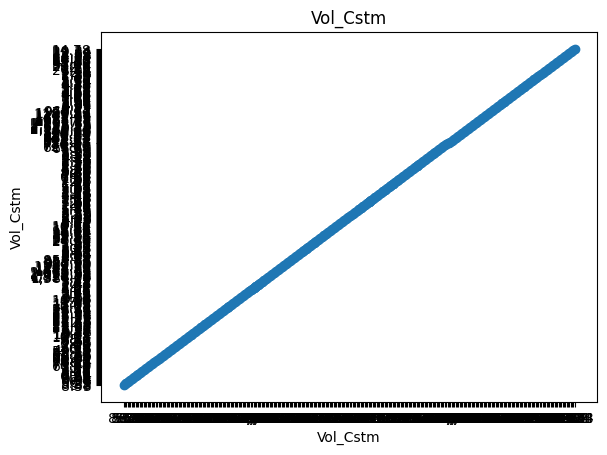

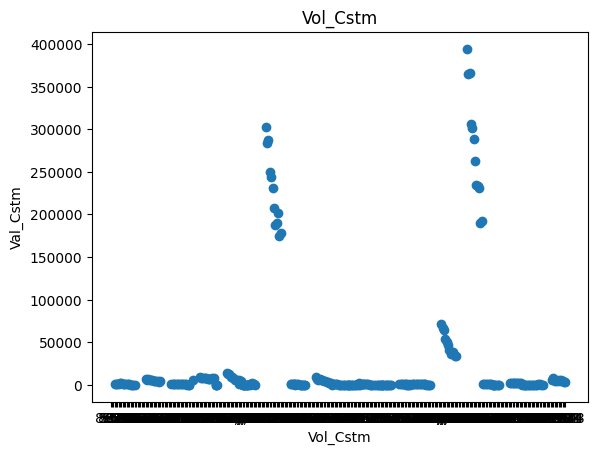

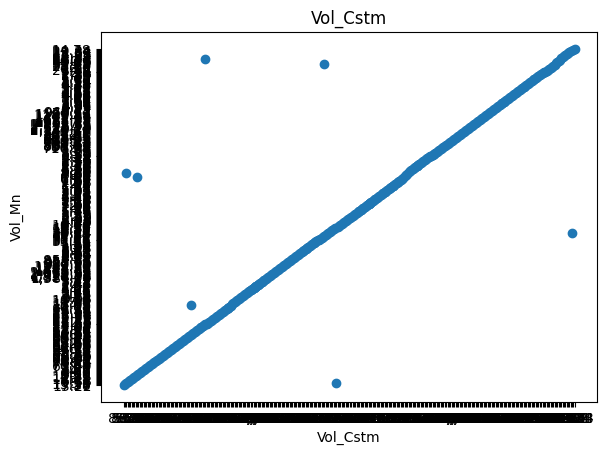

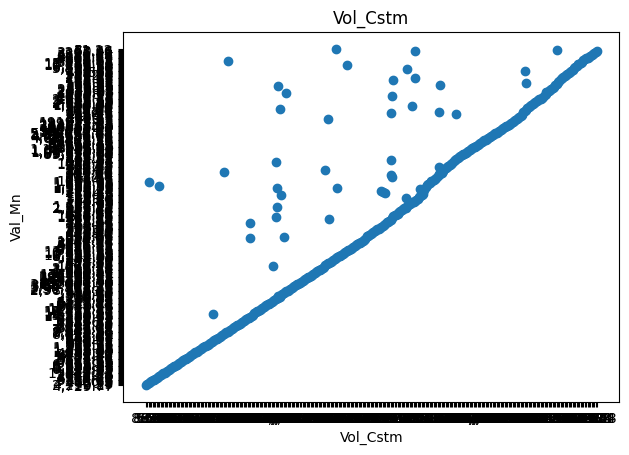

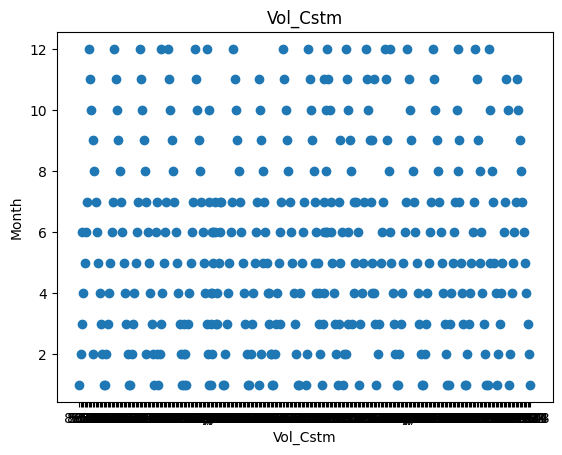

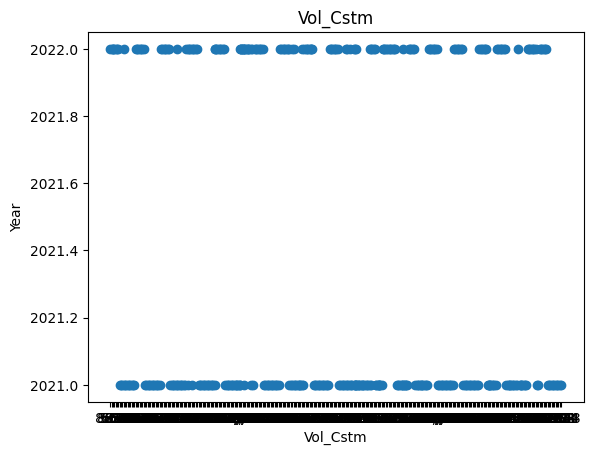

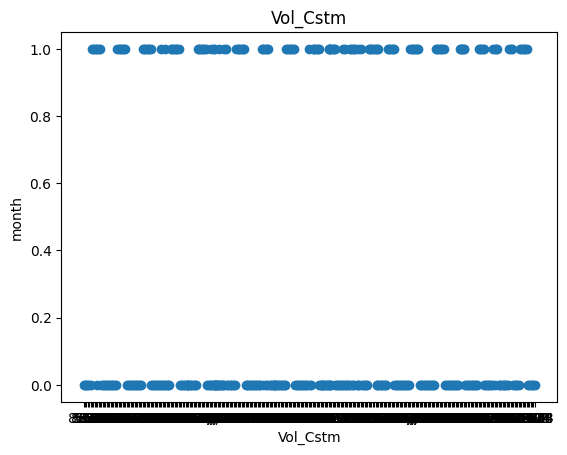

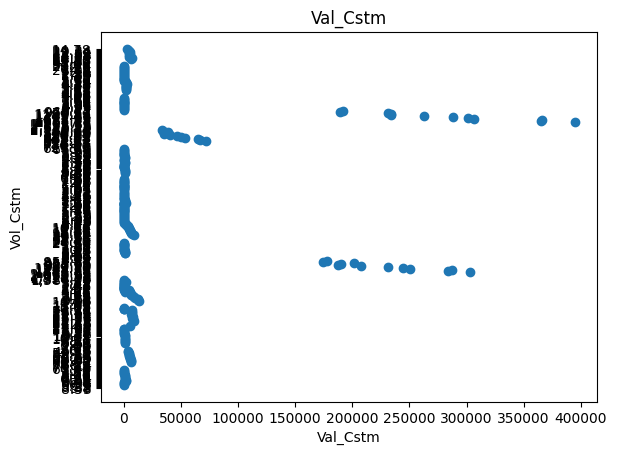

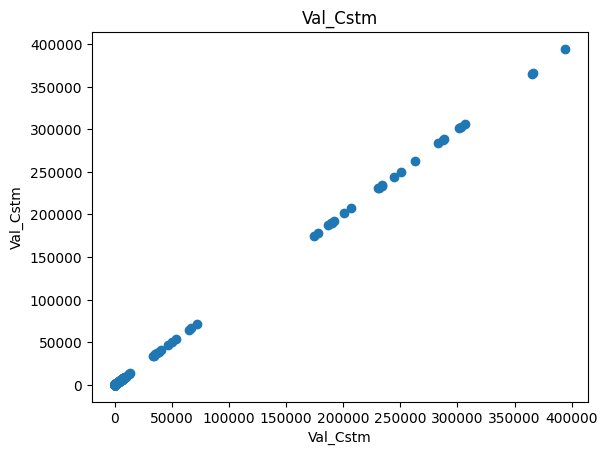

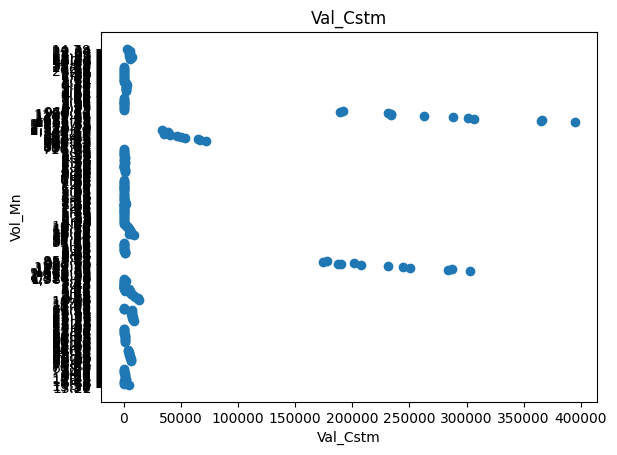

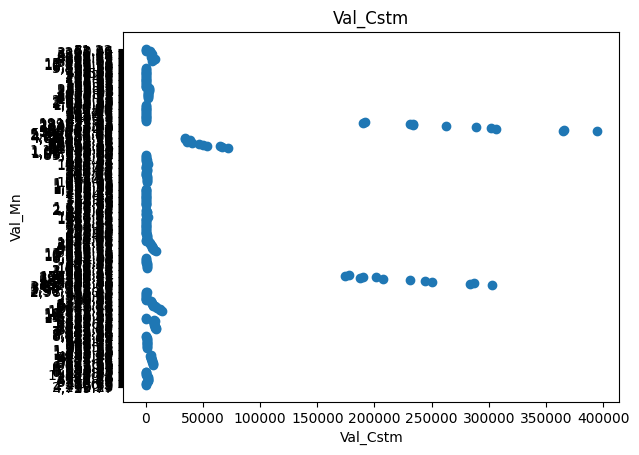

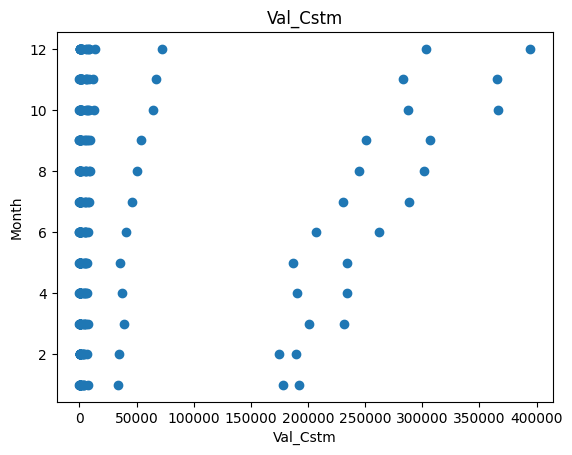

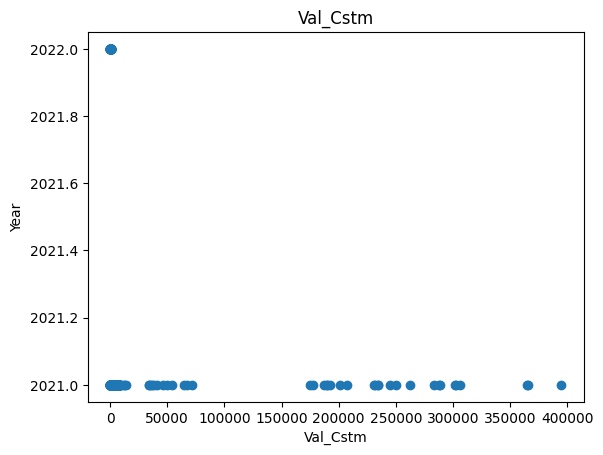

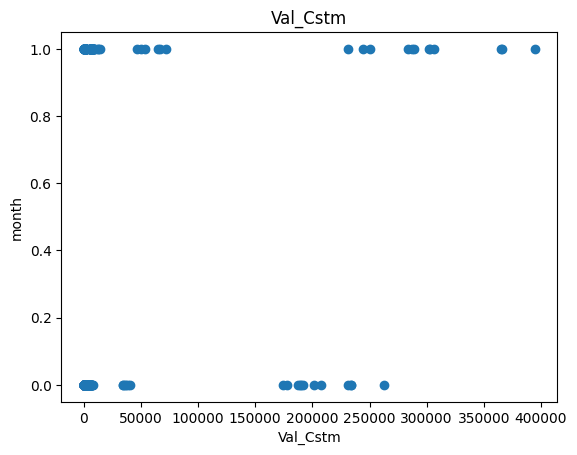

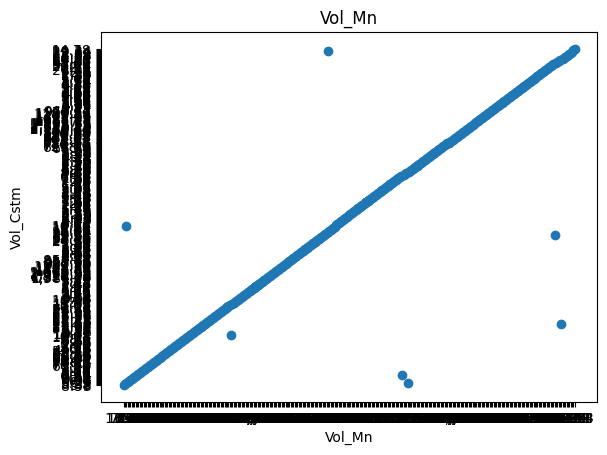

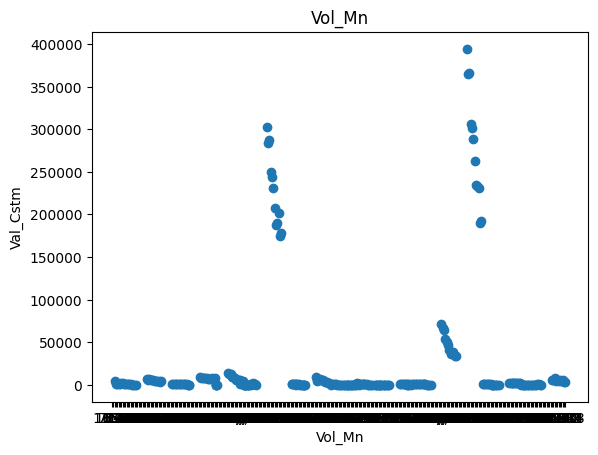

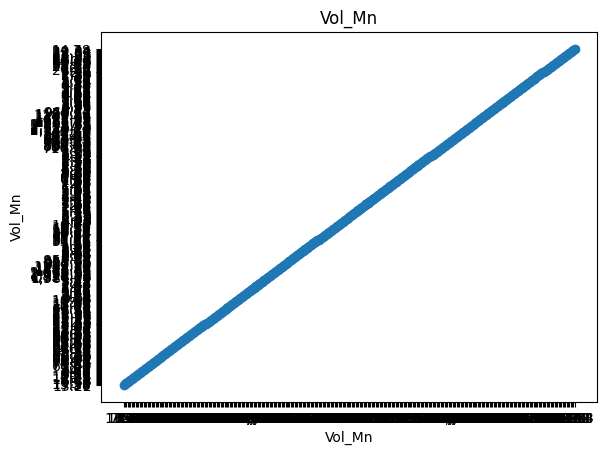

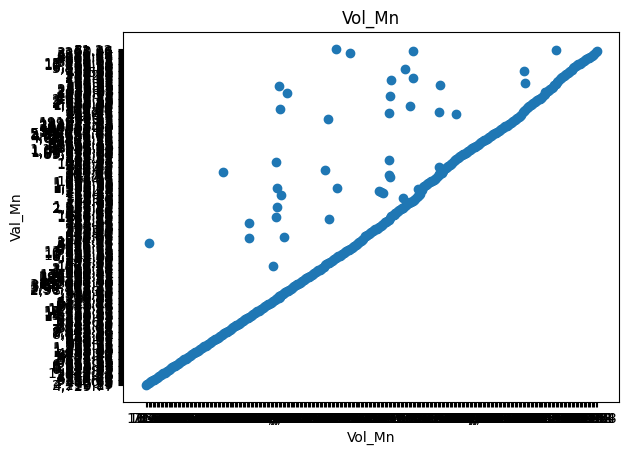

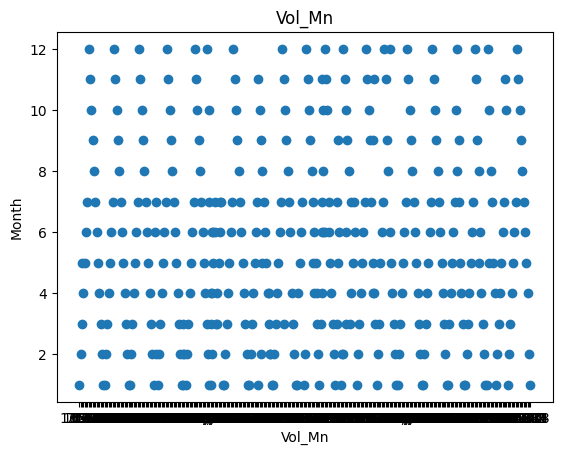

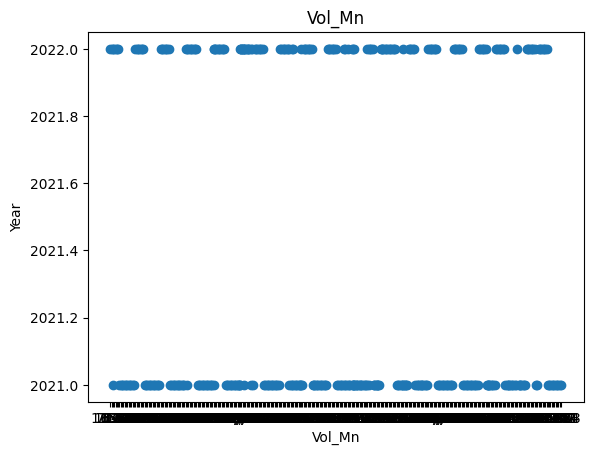

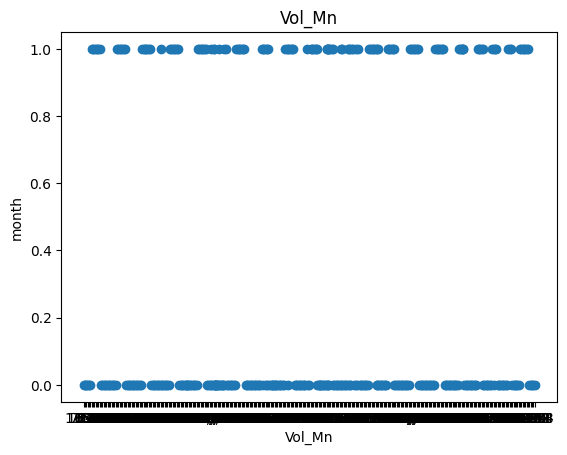

In [ ]:
for label in df.columns[0:4]:
  for lab in df.columns[1:]:
    plt.scatter(df[label], df[lab])
    plt.title(label)
    plt.ylabel(lab)
    plt.xlabel(label)
    plt.show()

In [ ]:
df['Vol_Cstm'] = pd.to_numeric(df['Vol_Cstm'], errors='coerce')
df['Val_Mn'] = pd.to_numeric(df['Val_Mn'], errors='coerce')
df['Vol_Mn'] = pd.to_numeric(df['Vol_Mn'], errors='coerce')

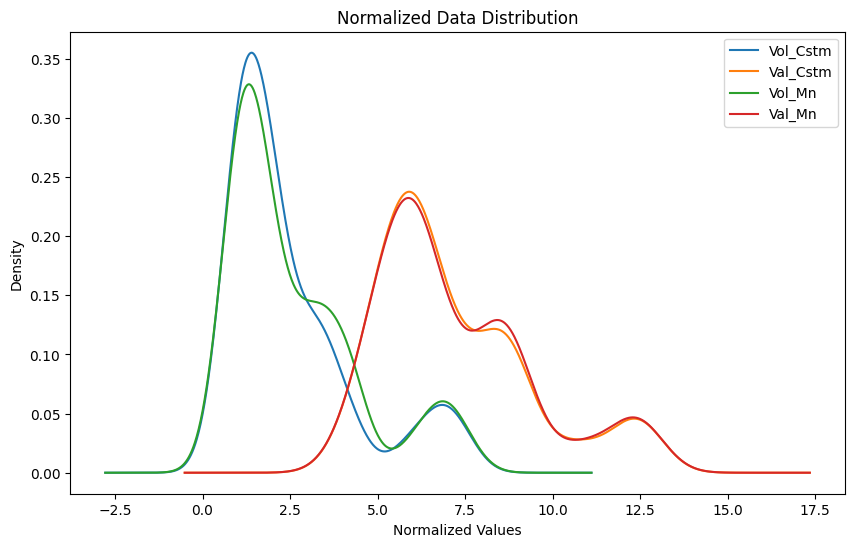

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Columns to normalize
columns_to_normalize = ["Vol_Cstm", "Val_Cstm", "Vol_Mn", "Val_Mn"]

scaler = StandardScaler()  # For Standardization

columns_to_convert = ["Vol_Cstm", "Val_Cstm", "Vol_Mn", "Val_Mn"]
columns_to_log_normalize = ["Vol_Cstm", "Val_Cstm", "Vol_Mn", "Val_Mn"]  # Add your column names

df[columns_to_log_normalize] = df[columns_to_log_normalize].astype(float)

# Apply log transformation to the specified columns
df[columns_to_log_normalize] = df[columns_to_log_normalize].apply(np.log1p)

# Convert columns from string to float
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Apply normalization to the selected columns
#df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df[columns_to_convert].plot(kind='density', figsize=(10, 6))  # Density plot for each column
plt.legend()
plt.title('Normalized Data Distribution')
plt.xlabel('Normalized Values')
plt.ylabel('Density')
plt.show()

## One Sample Z-Test##
**H0** The population mean value of transactional Value for UPI transactions in the first 6 months is equal to the specified mean.

**H1**The population mean value of transactional Value for UPI transactions in the first 6 months is not equal to the specified mean.


In [ ]:
Mean = np.mean(df['Val_Cstm'])
print(Mean)

7.212451366251175


In [ ]:
filtered_df = df[df['month'] == 0]
sample_size = 35
sample1 = filtered_df.sample(n=sample_size, random_state=79)

In [ ]:
sMean1 = np.mean(sample1['Val_Cstm'])
sStdDev1 = np.std(sample1["Val_Cstm"])
print("Mean:",round(sMean1,2))
print("Standard Deviation:",round(sStdDev1,2))

Mean: 7.81
Standard Deviation: 2.15


In [ ]:
alpha = 0.05
z_tab = 1.96
N = 35
Z = abs((sMean1-Mean)*math.sqrt(N)/sStdDev1)
print("Z_tab:",z_tab)
print("alpha:",alpha)
print("Z_cal:",Z)

Z_tab: 1.96
alpha: 0.05
Z_cal: 1.647679470123081


In [ ]:
if(Z <= z_tab):
  print("Zcal <= Ztab. Hence, we accept the Null Hypothesis Ho")
else :
  print("Zcal > Ztab. Hence, we reject the Null Hypothesis Ho")

Zcal <= Ztab. Hence, we accept the Null Hypothesis Ho


## Two Sample Z-test##
**H0**The average transaction amount by customer for both the half of a year is equal.

**H1**
The average transaction amount by customer for both the half of a year is not equal.


In [ ]:
filtered_df1 = df[df['month'] == 0]
sample_size_1 = 31
sample1 = filtered_df1.sample(n=sample_size_1, random_state=14)

filtered_df2 = df[df['month'] == 1]
sample_size_2 = 31
sample2 = filtered_df2.sample(n=sample_size_2, random_state=14)


In [ ]:
sMean1 = np.mean(sample1['Val_Cstm'])
sStdDev1 = np.std(sample2["Val_Cstm"])
print("Mean:",round(sMean1,2))
print("Standard Deviation:",round(sStdDev1,2))

Mean: 6.86
Standard Deviation: 2.31


In [ ]:
sMean2 = np.mean(sample2['Val_Cstm'])
sStdDev2 = np.std(sample2["Val_Cstm"])
print("Mean:",round(sMean2,2))
print("Standard Deviation:",round(sStdDev2,2))

Mean: 7.81
Standard Deviation: 2.31


In [ ]:
print("Ho: u1=u2. The average transaction amount by customer for both the half of a year is equal.")
print("H1: u1≠u2. The average transaction amount by customer for both the half of a year is not equal.")

n1=35
n2=31
α=5
Ztab=1.96
print("alpha:",α)
Sp = math.sqrt((sStdDev1*sStdDev1)/(n1-1) + (sStdDev2*sStdDev2)/(n2-1))
print("Sp=",round(Sp,2))

Z = abs((sMean1 - sMean2)/(Sp))

print("Z=",round(Z,2))
print("Ztab=",round(Ztab,2))
print("n1:",n1)
print("n2:",n2)
if(Z<=Ztab):
  print("Zcal <= Ztab. Hence, we accept the Null Hypothesis Ho. The average transaction amount by customer for both the half of a year is equal.")
else :
  print("Zcal > Ztab. Hence, we reject the Null Hypothesis Ho. The average transaction amount by customer for both the half of a year is not equal.")



Ho: u1=u2. The average transaction amount by customer for both the half of a year is equal.
H1: u1≠u2. The average transaction amount by customer for both the half of a year is not equal.
alpha: 5
Sp= 0.58
Z= 1.64
Ztab= 1.96
n1: 35
n2: 31
Zcal <= Ztab. Hence, we accept the Null Hypothesis Ho. The average transaction amount by customer for both the half of a year is equal.


## T-test for one sample##



**H0** The average transaction amout by Business is first half of year is equal to the average of population.

**H1** The average transaction amout by Business is first half of year is not equal to the average of population.

In [ ]:
Mean_Mn = abs(np.mean(df['Val_Mn']))
print("mean:",Mean_Mn)

mean: 7.2540084058617404


In [ ]:
filtered_df = df[df['month'] == 0]
sample_size = 29
sample3 = filtered_df.sample(n=sample_size, random_state=42)
sample3.head()

,banks,Vol_Cstm,Val_Cstm,Vol_Mn,Val_Mn,Month,Year,month
54,Axis Bank Apps,2.257588,6.559049,4.302307,6.619953,3,2021,0
13,Airtel Payments Bank Apps,1.801710,7.188609,2.039921,7.945534,6,2021,0
281,Paytm Payments Bank App,5.846410,10.562407,5.996850,10.674111,3,2021,0
131,HDFC Bank Apps,1.864080,NaN,1.864080,NaN,3,2022,0
241,Kotak Mahindra Bank Apps,1.214913,6.060057,1.214913,6.060057,5,2021,0


In [ ]:
sMean_Mn = abs(np.mean(sample3['Val_Cstm']))
sStdDev_Mn = np.std(sample3["Val_Cstm"])
print("Mean:",round(sMean_Mn,2))
print("Standard Deviation:",round(sStdDev_Mn,2))

Mean: 7.12
Standard Deviation: 2.06


In [ ]:
print("H0 : The average transaction amout by Business is first half of year is equal to the average of population. ")
print("Ha : The average transaction amout by Business is first half of year is equal to the average of population. ")
α=0.05
n=29
DF = print("DF:", n-1)
print("alpha:",α)
ttab = 2.048
print("Ttab:", ttab)
t = abs((Mean_Mn - sMean_Mn)/(sStdDev_Mn/math.sqrt(n)))

print("Tcal:", t,2)

if(t <= ttab ):
  print("Tcal <= Ttab. Hence, we accept the Null Hypothesis Ho. The average transaction amout by Business is first half of year is equal to the average of population. ")
else :
  print("Tcal > Ttab. Hence, we reject the Null Hypothesis Ho. The average transaction amout by Business is first half of year is not equal to the average of population. ")


H0 : The average transaction amout by Business is first half of year is equal to the average of population. 
Ha : The average transaction amout by Business is first half of year is equal to the average of population. 
DF: 28
alpha: 0.05
Ttab: 2.048
Tcal: 0.341286362725208 2
Tcal <= Ttab. Hence, we accept the Null Hypothesis Ho. The average transaction amout by Business is first half of year is equal to the average of population. 


##T-test for two sample##

**H0**:The average transaction amount by Business and Customer is equal.

**H1**:The average transaction amount by Business and Customer is not equal.


In [ ]:
sample_size = n1=n2=28
Mn_sample = df.sample(n=sample_size, random_state=28)
C_sample = df.sample(n=sample_size, random_state=56)
Mn_sample.head()

,banks,Vol_Cstm,Val_Cstm,Vol_Mn,Val_Mn,Month,Year,month
61,BHIM,3.253470,NaN,3.253470,NaN,3,2022,0
234,Kotak Mahindra Bank Apps,2.000128,7.064699,2.000128,7.064699,12,2021,1
337,State Bank of India Apps,1.637053,7.766451,1.637053,7.766451,4,2021,0
328,State Bank of India Apps,1.638997,NaN,1.638997,NaN,7,2022,1
358,WhatsApp,3.179719,6.063925,3.179719,6.063925,6,2022,0


In [ ]:
Mn_mean = np.mean(Mn_sample["Val_Mn"])
C_mean = np.mean(C_sample["Val_Cstm"])
print("Mean:",round(Mn_mean,2))
print("Mean:",round(C_mean,2))

Mean: 7.73
Mean: 7.54


In [ ]:
C_StdDev = np.std(C_sample["Val_Mn"])
Mn_StdDev = np.std(Mn_sample["Val_Mn"])
print("Standard Deviation of Buisness:",round(Mn_StdDev,2))
print("Standard Deviation of CustomerS:",round(C_StdDev,2))

Standard Deviation of Buisness: 2.15
Standard Deviation of CustomerS: 2.1


In [ ]:
print("Ho: The average transaction amount by Buisness and Customer are equal.")
print("H1: The average transaction amount by Buisness and Customer are equal.")

print("Degrees of freedom is (n-1)=27")
ttab = 2.052
α=0.05
print("ttab:",ttab)
print("alpha",α)
Sp = math.sqrt((C_StdDev*C_StdDev)/(n1-1) + (Mn_StdDev*Mn_StdDev)/(n2-1))
tcal = round((abs(Mn_mean-C_mean)/Sp), 4)
print("tcal:",tcal)

if(tcal<=ttab):
  print("tcal <= ttab. Hence, we accept the Null Hypothesis Ho. The average transaction amount by Buisness and Customer are equal.")
else :
  print("tcal > ttab. Hence, we reject the Null Hypothesis Ho. The average transaction amount by Buisness and Customer are not equal.")


Ho: The average transaction amount by Buisness and Customer are equal.
H1: The average transaction amount by Buisness and Customer are equal.
Degrees of freedom is (n-1)=27
ttab: 2.052
alpha 0.05
tcal: 0.3354
tcal <= ttab. Hence, we accept the Null Hypothesis Ho. The average transaction amount by Buisness and Customer are equal.


#__UNIT 3__#

##**Runs Test**##

**H0:**The distribution of customer transactions is random.

**H1:**The distribution of customer transactions is not random.

In [ ]:
df=pd.read_csv("/content/UPI_22.csv")
df.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,8.53,"2,047.45",13.22,"4,729.77",1,2022
1,Airtel Payments Bank Apps,5.8,"1,199.46",7.58,"2,210.17",2,2022
2,Airtel Payments Bank Apps,8.33,"1,934.41",13.16,"4,492.25",3,2022
3,Airtel Payments Bank Apps,5.29,454.64,5.3,460.9,4,2022
4,Airtel Payments Bank Apps,6.1,486.55,6.11,486.62,5,2022


In [ ]:
subset = df[df['Month'] == 1]
subset = subset.head(10)
volume = subset['Volume (Mn)']
print(volume)
alpha = 0.1

0        13.22
7         73.5
14       47.25
23       25.82
30        1.21
32       10.68
49    1,584.20
56        4.94
63       33.43
70        1.22
Name: Volume (Mn), dtype: object


In [ ]:
# Converting all the string values to numeric
volume = pd.to_numeric(volume.str.replace(',', ''), errors='coerce')

In [ ]:
median = np.median(volume)
print("Median:",median)

Median: 19.52


In [ ]:
runs_num = 0
n1 = 0
n2 = 0
above_median = None

for individual_bank in volume:
    if individual_bank > median:
        if above_median is False or above_median is None:
            runs_num += 1
        above_median = True
        n2 += 1
    elif individual_bank < median:
        if above_median is True or above_median is None:
            runs_num += 1
        above_median = False
        n1 += 1
    elif individual_bank == median:
      above_median = None


print("Number of runs:", runs_num)
print("n1:", n1)
print("n2:", n2)

Number of runs: 7
n1: 5
n2: 5


In [ ]:
print("The critical values from the table for n1 & n2 are 2 and 10.")
critical_b = 2
critical_a = 10

The critical values from the table for n1 & n2 are 2 and 10.


In [ ]:
print("runs_num:",runs_num, "critical_a:",critical_a, "critical_b",critical_b)
if critical_b < runs_num < critical_a:
    print("Accept H0.")
else:
    print("Reject H0.")

runs_num: 7 critical_a: 10 critical_b 2
Accept H0.


##**Sign Test**##

###Single sample Sign test###

**H0**: Median of customer transaction is 6 Mn

**H1**: Median of customer transaction is not 6 Mn

In [ ]:
data = pd.read_csv('UPI_22.csv')

In [ ]:
subset = data[data['Month'] == 2]
volume = subset['Volume (Mn) By Costumers']
volume = pd.to_numeric(volume.str.replace(',', ''), errors='coerce')
# Converting all the string values to numeric

print(volume)
Sample_size = 22

1         5.80
8        63.49
15        6.90
24       23.25
31        1.73
33       10.08
50     1524.09
57        4.59
64       27.39
71        1.21
78        2.21
89        1.97
101       1.13
103       6.91
110       3.78
117     613.77
124    2120.20
131       3.14
138       3.38
145       1.51
147       2.24
154      31.99
Name: Volume (Mn) By Costumers, dtype: float64


In [ ]:
median = np.median(volume)
print("Median:",median)

Median: 5.195


In [ ]:
n1 = 0  # Number of negative signs
n2 = 0  # Number of positive signs

for rank in volume:
    if rank > median:
        n2 += 1
    elif rank < median:
        n1 += 1

print("Number with Negative signs:", n1)
print("Number with Positive signs:", n2)
n = n1 + n2

Number with Negative signs: 11
Number with Positive signs: 11


In [ ]:
alpha = 0.1
critical_value = 1.645 # For Two tailed test, at 0.1 Level of Significance

In [ ]:
if Sample_size < 26:
    test_value = min(n1, n2)
    critical_value = 2
else:
    test_value = ((min(n1,n2)+ 0.05) - (sample_size / 2))/ np.sqrt(sample_size / 2)
print(alpha)
print(critical_value)
print("Test value is:",test_value)


0.1
2
Test value is: 11


In [ ]:
if test_value <= critical_value:
    print("Reject H0.")
else:
    print("Accept H0.")

Accept H0.


###Paired sample Sign test###

**H0**: There is significant difference between two year's samples.

**H1**: There is no significant difference between two year's samples.

In [ ]:
from scipy.stats import binom
file_path_bank_a = "UPI_21.csv"

df_bank_a = pd.read_csv(file_path_bank_a)
year_2021 = df_bank_a['Value (Cr) by Costumers']

In [ ]:
file_path_bank_b = "UPI_22.csv"


# Read the CSV files into separate DataFrames
df_bank_b = pd.read_csv(file_path_bank_b)
year_2022 = df_bank_b['Value (Cr) by Costumers']


In [ ]:
dfx = pd.concat([year_2022, year_2021], axis=1)
dfx.columns = ['year_2022', 'year_2021']

In [ ]:
dfx.head()

,year_2022,year_2021
0,"2,047.45",2248.49
1,"1,199.46",1923.95
2,"1,934.41",1491.34
3,454.64,1520.92
4,486.55,1396.65


In [ ]:
data_type = dfx['year_2022'].dtype
print(data_type)

object


In [ ]:
dfx['year_2021'] = pd.to_numeric(dfx['year_2021'], errors='coerce')
dfx['year_2022'] = pd.to_numeric(dfx['year_2022'], errors='coerce')

In [ ]:
observed_pairs = [(a, b) for a, b in zip(dfx['year_2021'], dfx['year_2022'])]
differences = [a - b for a, b in observed_pairs]

In [ ]:
num_positive = sum(1 for diff in differences if diff > 0)
num_negative = sum(1 for diff in differences if diff < 0)
num_ties = sum(1 for diff in differences if diff == 0)
n = len(differences)

In [ ]:
# Calculate the p-value using the binomial distribution
# under the null hypothesis (assuming no difference)
p_value = 2 * min(binom.cdf(num_positive, n, 0.5), binom.cdf(num_negative, n, 0.5))
print("pvalue:",p_value)
# Print the results
print(f"Number of positive differences: {num_positive}")
print(f"Number of negative differences: {num_negative}")
print(f"Number of ties: {num_ties}")
print(f"Total number of observations: {n}")
print(f"P-value: {p_value:.4f}")

pvalue: 6.976197397440452e-53
Number of positive differences: 60
Number of negative differences: 9
Number of ties: 0
Total number of observations: 226
P-value: 0.0000


In [ ]:
# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference between Bank A and Bank B.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference between Bank A and Bank B.")

Reject the null hypothesis
There is a significant difference between Bank A and Bank B.


##**Wilcoxon Rank Sum Test**##

It is performend when the samples are independent.
The sample doesn't follow normal distribution.

We are taking 2 independent samples of the total transaction amount done by the customers of 2 banks Airtel Payments Bank and Cred.

H0 : (**median_a = median_b**) The transactions done by both banks are similar

H1 : (**median_a != median_b**) The transactions done by both banks are not similar

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

In [ ]:
df = pd.read_csv('UPI_22.csv')
Score_one = df[df['UPI Banks'] == 'Airtel Payments Bank Apps'][['Volume (Mn)']]
Score_one['Group'] = 'A'
print(Score_one)

  Volume (Mn) Group
0       13.22     A
1        7.58     A
2       13.16     A
3         5.3     A
4        6.11     A
5        6.38     A
6        7.41     A


In [ ]:
Score_two = df[df['UPI Banks'] == 'Cred'][['Volume (Mn)']]
Score_two['Group'] = 'B'
print(Score_two)

   Volume (Mn) Group
32       10.68     B
33       10.08     B
34       12.11     B
35       13.05     B
36       13.89     B
37        13.4     B
38       14.89     B


In [ ]:
combined_data = pd.concat([Score_one, Score_two])
print(combined_data)

   Volume (Mn) Group
0        13.22     A
1         7.58     A
2        13.16     A
3          5.3     A
4         6.11     A
5         6.38     A
6         7.41     A
32       10.68     B
33       10.08     B
34       12.11     B
35       13.05     B
36       13.89     B
37        13.4     B
38       14.89     B


In [ ]:
combined_data = combined_data.sort_values(by='Volume (Mn)').reset_index(drop=True)

combined_data['rank'] = range(1, len(combined_data) + 1)

print(combined_data)

   Volume (Mn) Group  rank
0        10.08     B     1
1        10.68     B     2
2        12.11     B     3
3        13.05     B     4
4        13.16     A     5
5        13.22     A     6
6         13.4     B     7
7        13.89     B     8
8        14.89     B     9
9          5.3     A    10
10        6.11     A    11
11        6.38     A    12
12        7.41     A    13
13        7.58     A    14


In [ ]:
size_a = len(Score_one)
size_b = len(Score_two)

In [ ]:
sum_ranks = combined_data.loc[combined_data['Group'] == 'B', 'rank'].sum() if size_b < size_a else combined_data.loc[combined_data['Group'] == 'A', 'rank'].sum()
print("No. Group A:", size_a)
print("No. Group B:", size_b)
print("R: ", sum_ranks)

No. Group A: 7
No. Group B: 7
R:  71


In [ ]:
n1 = size_a
n2 = size_b

sigma = np.sqrt((n1*n2*(n1 + n2 + 1))/ 12)
print("Sigma:",sigma)


u = (n1*(n1 + n2 + 1)) / 2
print("u:",u)

print("R:",sum_ranks)

Sigma: 7.826237921249264
u: 52.5
R: 71


In [ ]:
R = sum_ranks
test_value = (R - u) / sigma
print("Test value is:",test_value)

Test value is: 2.3638432904997777


In [ ]:
critic_val_positive = 1.645
critic_val_negative = -1.645
print("Test value is:",test_value)
print("Critical value:",critic_val_positive)

if critic_val_negative < test_value < critic_val_positive:
    print("Accept H0.")
else:
    print("Reject H0.")

Test value is: 2.3638432904997777
Critical value: 1.645
Reject H0.


## **Wilcoxon Signed rank test**##


H0: There is significant difference between transaction of Cred in 2020 and 2021

H1: There is no significant differnce

In [ ]:
df = pd.read_csv("UPI.csv")
df['Volume (Mn)'] = df['Volume (Mn)'].replace({',': ''}, regex=True).astype(float)

Group_a = df.loc[(df['UPI Banks'] == 'Cred') & (df['Year'] == 2021) & (df['Month'].isin(range(1, 8))), 'Volume (Mn)'].tolist()

# Filter Group B for the year 2022 and select "Volume (Mn)"
Group_b = df.loc[(df['UPI Banks'] == 'Cred') & (df['Year'] == 2022) & (df['Month'].isin(range(1, 8))), 'Volume (Mn)'].tolist()

# Display the results
print("Group A - Volume (Mn):")
print(Group_a)
print("\nGroup B - Volume (Mn):")
print(Group_b)



Group A - Volume (Mn):
[7.12, 5.77, 5.65, 5.08, 4.96, 3.94, 4.08]

Group B - Volume (Mn):
[10.68, 10.08, 12.11, 13.05, 13.89, 13.4, 14.89]


In [ ]:
n = 7


differences = [a - b for a, b in zip(Group_a, Group_b)]
absolute_diff = [abs(diff) for diff in differences]

differences_data = {
    'Score A': Group_a,
    'Score B': Group_b,
    'Difference': differences,
    'Absolute Difference': absolute_diff
}

differences_table = pd.DataFrame(differences_data)
differences_table['Rank'] = differences_table['Absolute Difference'].rank()
differences_table['Signed Rank'] = differences_table.apply(lambda row: f"+{int(row['Rank'])}" if row['Difference'] > 0 else f"-{int(row['Rank'])}" if row['Difference'] < 0 else "", axis=1)

print(differences_table)

   Score A  Score B  Difference  Absolute Difference  Rank Signed Rank
0     7.12    10.68       -3.56                 3.56   1.0          -1
1     5.77    10.08       -4.31                 4.31   2.0          -2
2     5.65    12.11       -6.46                 6.46   3.0          -3
3     5.08    13.05       -7.97                 7.97   4.0          -4
4     4.96    13.89       -8.93                 8.93   5.0          -5
5     3.94    13.40       -9.46                 9.46   6.0          -6
6     4.08    14.89      -10.81                10.81   7.0          -7


In [ ]:
differences = [a - b for a, b in zip(Group_a, Group_b)]
absolute_diff = [abs(diff) for diff in differences]

differences_data = {
    'Score A': Group_a,
    'Score B': Group_b,
    'Difference': differences,
    'Absolute Difference': absolute_diff
}

differences_table = pd.DataFrame(differences_data)
differences_table['Rank'] = differences_table['Absolute Difference'].rank()
differences_table['Signed Rank'] = differences_table.apply(lambda row: f"+{int(row['Rank'])}" if row['Difference'] > 0 else f"-{int(row['Rank'])}" if row['Difference'] < 0 else "", axis=1)

print(differences_table)

   Score A  Score B  Difference  Absolute Difference  Rank Signed Rank
0     7.12    10.68       -3.56                 3.56   1.0          -1
1     5.77    10.08       -4.31                 4.31   2.0          -2
2     5.65    12.11       -6.46                 6.46   3.0          -3
3     5.08    13.05       -7.97                 7.97   4.0          -4
4     4.96    13.89       -8.93                 8.93   5.0          -5
5     3.94    13.40       -9.46                 9.46   6.0          -6
6     4.08    14.89      -10.81                10.81   7.0          -7


In [ ]:
positive_ranks = differences_table[differences_table['Signed Rank'].str.startswith('+')]
negative_ranks = differences_table[differences_table['Signed Rank'].str.startswith('-')]

sum_positive_ranks = positive_ranks['Rank'].sum()
sum_negative_ranks = negative_ranks['Rank'].sum()

print("Sum of Positive Ranks:", sum_positive_ranks)
print("Sum of Negative Ranks:", sum_negative_ranks)

Sum of Positive Ranks: 0.0
Sum of Negative Ranks: 28.0


In [ ]:
Ws = min(sum_positive_ranks,sum_negative_ranks)
test_val = (Ws - ((n * (n + 1)) / 4)) / np.sqrt((n * (n + 1) * (2 * n + 1)) / 24)

print("Test value:",test_val)

critic_val_positive = 1.645
critic_val_negative = -1.645
print("Critical value:",critic_val_positive)

if critic_val_negative < test_val < critic_val_positive:
    print("Accept H0.")
else:
    print("Reject H0.")

Test value: -2.3664319132398464
Critical value: 1.645
Reject H0.


#__UNIT 4__#

##__CHI Square Test-Goodness of fit__##

The researcher is testing whether the transaction volumes across months show a uniform distribution for each bank app, evaluating if there's a significant difference between observed and expected frequencies.

H0:The distribution of transaction volumes for a specific UPI bank across months is consistent and follows an expected pattern over the two-year period.

H1:The distribution of transaction volumes for a specific UPI bank across months is not consistent and does not follow an expected pattern over the two-year period.

In [ ]:
import pandas as pd
from scipy.stats import chisquare
file_path = '/content/UPI.csv'
df = pd.read_csv(file_path)
df.head()


,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,8.53,"2,047.45",13.22,"4,729.77",1,2022
1,Airtel Payments Bank Apps,5.8,"1,199.46",7.58,"2,210.17",2,2022
2,Airtel Payments Bank Apps,8.33,"1,934.41",13.16,"4,492.25",3,2022
3,Airtel Payments Bank Apps,5.29,454.64,5.3,460.9,4,2022
4,Airtel Payments Bank Apps,6.1,486.55,6.11,486.62,5,2022


In [ ]:
# # Get a list of unique UPI banks in your dataset
unique_banks = df['UPI Banks'].unique()


In [ ]:
df['Volume (Mn)'] = pd.to_numeric(df['Volume (Mn)'], errors='coerce')

In [ ]:
from scipy.stats import chisquare

data = {
    'UPI Banks': ['Airtel', 'Airtel', 'Amazon', 'Amazon'],
    'Month': ['Month 1', 'Month 2', 'Month 1', 'Month 2'],
    'Volume (Mn)': [8.53, 5.8, 73.5, 63.49]
}

df = pd.DataFrame(data)


unique_banks = df['UPI Banks'].unique()


alpha = 0.05

for bank in unique_banks:

    specific_bank_data = df[df['UPI Banks'] == bank]
    total_volume = specific_bank_data['Volume (Mn)'].sum()
    months = specific_bank_data['Month'].unique()
    expected_freq = total_volume / len(months)


    observed_freq = specific_bank_data.groupby('Month')['Volume (Mn)'].sum()


    chi_square_statistic = np.sum((observed_freq - expected_freq)**2 / expected_freq)

    degrees_of_freedom = len(months) - 1
    critical_value = 5.991

    print(f"\nResults for {bank}:")
    print(f"Chi-square statistic: {chi_square_statistic}")
    print(f"Critical Value: {critical_value}")

    if chi_square_statistic > critical_value:
        print("Reject the null hypothesis: The distribution does not follow an expected pattern")
    else:
        print("Accept null hypothesis: The distribution follows an expected pattern")



Results for Airtel:
Chi-square statistic: 0.5200907187718072
Critical Value: 5.991
Accept null hypothesis: The distribution follows an expected pattern

Results for Amazon:
Chi-square statistic: 0.7314409810935101
Critical Value: 5.991
Accept null hypothesis: The distribution follows an expected pattern


##__CHI Square Test-Test for Homogeneity__##

H0:There is no association between UPI Banks and Months

H1:There is an association between UPI Banks and Months

In [ ]:
from scipy.stats import chi2_contingency, chi2

In [ ]:
file_path = '/content/UPI.csv'
df = pd.read_csv(file_path)

df['Volume (Mn) By Costumers'] = pd.to_numeric(df['Volume (Mn) By Costumers'], errors='coerce').fillna(0)

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(index=df['UPI Banks'],
                                columns=df['Month'],
                                values=df['Volume (Mn) By Costumers'],
                                aggfunc='sum',
                                margins=True,
                                margins_name='Total')

contingency_table.fillna(0, inplace=True)


row_totals = contingency_table.iloc[:-1, -1].values
col_totals = contingency_table.iloc[-1, :-1].values
grand_total = contingency_table.iloc[-1, -1]

expected_frequencies = np.outer(row_totals, col_totals) / grand_total


observed_frequencies = contingency_table.iloc[:-1, :-1].values
chi_squared_stat = np.sum((observed_frequencies - expected_frequencies)**2 / expected_frequencies)

df_rows = len(row_totals) - 1
df_columns = len(col_totals) - 1
degrees_of_freedom = df_rows * df_columns

critical_value = 16.919


if chi_squared_stat > critical_value:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"


print("\nResults:")
print(f"Chi-squared statistic: {chi_squared_stat}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Critical value: {critical_value}")
print(f"Decision: {decision}")


Results:
Chi-squared statistic: 3003.2714756806745
Degrees of freedom: 363
Critical value: 16.919
Decision: Reject the null hypothesis


##__CHI Square Test-For Independence__##

H0 = There is no significant association between UPI Banks and Months.

H1 = There is a significant association between UPI Banks and Months.

In [ ]:
file_path = '/content/UPI.csv'
df = pd.read_csv(file_path)
df.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,8.53,"2,047.45",13.22,"4,729.77",1,2022
1,Airtel Payments Bank Apps,5.8,"1,199.46",7.58,"2,210.17",2,2022
2,Airtel Payments Bank Apps,8.33,"1,934.41",13.16,"4,492.25",3,2022
3,Airtel Payments Bank Apps,5.29,454.64,5.3,460.9,4,2022
4,Airtel Payments Bank Apps,6.1,486.55,6.11,486.62,5,2022


In [ ]:
contingency_table = pd.crosstab(index=df['UPI Banks'],
                                columns=df['Month'])
print(contingency_table)
observed_frequencies = contingency_table.iloc[:-1, :-1].values
row_totals = contingency_table.iloc[:-1, -1].values
col_totals = contingency_table.iloc[-1, :-1].values
total = contingency_table.iloc[-1, -1]

expected_frequencies = np.outer(row_totals, col_totals) / total


chi_square_statistic = np.sum((observed_frequencies - expected_frequencies)**2 / expected_frequencies)


degrees_of_freedom = (len(row_totals) - 1) * (len(col_totals) - 1)
alpha = 0.05

critical_value = 10.828


#print(f"Chi2 Statistic: {chi_square_statistic}")
print(f"Critical Value: {critical_value}")

if chi_square_statistic > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Month                          1   2   3   4   5   6   7   8   9   10  11  12
UPI Banks                                                                    
Airtel Payments Bank Apps       2   2   2   2   2   2   2   1   1   1   1   1
Amazon Pay                      2   2   2   2   2   2   2   1   1   1   1   1
Axis Bank Apps                  2   2   2   2   2   2   2   1   1   1   1   1
BHIM                            2   2   2   2   2   2   2   1   1   1   1   1
Bajaj Finserv                   0   0   0   0   0   1   1   0   0   0   0   0
Cointab                         1   1   0   0   0   0   0   0   0   0   0   0
Cred                            2   2   2   2   2   2   2   1   1   1   1   1
Deutsche Bank Apps              0   0   1   1   1   1   1   0   0   0   0   0
Federal Bank Apps               0   0   1   1   1   1   1   0   0   0   0   0
Freecharge                      1   0   0   0   0   0   0   0   0   0   0   0
Google Pay                      2   2   2   2   2   2   2   1   

<ipython-input-297-72225f18efef>:9: RuntimeWarning: divide by zero encountered in divide
  expected_frequencies = np.outer(row_totals, col_totals) / total
<ipython-input-297-72225f18efef>:9: RuntimeWarning: invalid value encountered in divide
  expected_frequencies = np.outer(row_totals, col_totals) / total
<ipython-input-297-72225f18efef>:12: RuntimeWarning: invalid value encountered in divide
  chi_square_statistic = np.sum((observed_frequencies - expected_frequencies)**2 / expected_frequencies)


In [ ]:
print(f"Critical Value: {critical_value}")

if chi_square_statistic > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Critical Value: 10.828
Fail to reject the null hypothesis


##__CHI Square Test-2x2 Contingency table__##

In [ ]:
file_path = "/content/UPI.csv"
data = pd.read_csv(file_path)


subset_2x2 = data.iloc[:3, :3]


output_file = 'subset_2x2.csv'
subset_2x2.to_csv(output_file, index=False)

print(f"CSV file '{output_file}' has been created with the 2x2 subset of data.")


CSV file 'subset_2x2.csv' has been created with the 2x2 subset of data.


In [ ]:
data=pd.read_csv('/content/subset_2x2.csv')

print(data)

                   UPI Banks  Volume (Mn) By Costumers Value (Cr) by Costumers
0  Airtel Payments Bank Apps                      8.53                2,047.45
1  Airtel Payments Bank Apps                      5.80                1,199.46
2  Airtel Payments Bank Apps                      8.33                1,934.41


Problem Statement:
To determine whether there's a significant difference in transaction volumes between Airtel Payments Bank Apps and Amazon Pay in terms of UPI transactions performed by customers.

Hypothesis:
Null Hypothesis (H0): There is no significant difference in transaction volumes between Airtel Payments Bank Apps and Amazon Pay.


Alternative Hypothesis (H1): There is a significant difference in transaction volumes between Airtel Payments Bank Apps and Amazon Pay.

In [ ]:
data = {
    'Bank': ['Airtel', 'Airtel', 'Amazon', 'Amazon'],
    'Month': ['Month 1', 'Month 2', 'Month 1', 'Month 2'],
    'Volume': [8.53, 5.8, 73.5, 63.49]
}

df = pd.DataFrame(data)

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Bank'], df['Month'], values=df['Volume'], aggfunc='sum', margins=True)

# Calculate expected frequencies
observed_frequencies = contingency_table.iloc[:-1, :-1].values
row_totals = contingency_table.iloc[:-1, -1].values
col_totals = contingency_table.iloc[-1, :-1].values
total = contingency_table.iloc[-1, -1]

expected_frequencies = np.outer(row_totals, col_totals) / total


chi_square_statistic = np.sum((observed_frequencies - expected_frequencies)**2 / expected_frequencies)


degrees_of_freedom = (len(row_totals) - 1) * (len(col_totals) - 1)
alpha = 0.05

critical_value = 3.841

print(f"alpha: {alpha}")
print(f"Chi2 Statistic: {chi_square_statistic}")
print(f"Critical Value: {critical_value}")

if chi_square_statistic > critical_value:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

alpha: 0.05
Chi2 Statistic: 0.18019732074577127
Critical Value: 3.841
Accept the null hypothesis


#__Unit 5__#

## Sample Size Estimation

In [ ]:
dff = pd.read_csv("UPI.csv")

In [ ]:
dff.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,8.53,"2,047.45",13.22,"4,729.77",1,2022
1,Airtel Payments Bank Apps,5.8,"1,199.46",7.58,"2,210.17",2,2022
2,Airtel Payments Bank Apps,8.33,"1,934.41",13.16,"4,492.25",3,2022
3,Airtel Payments Bank Apps,5.29,454.64,5.3,460.9,4,2022
4,Airtel Payments Bank Apps,6.1,486.55,6.11,486.62,5,2022


# Sample Size Estimation for single mean

**Suppose you want to estimate the mean transaction value for a particular UPI bank with a 95% confidence level and a margin of error of 10.**

 To do this, you'll need to calculate the required sample size using the formula **n = (Z^2 * σ^2)/E^2**,
where
n
n is the sample size,
Z is the z-value corresponding to the confidence level,
σ is the population standard deviation, and
E is the margin of error.

In [ ]:
import math

#Hypothetical Values according to the Use Case
confidence_level = 0.95
margin_of_error = 10
population_std_dev = 50


z_tab_value = 1.96


sample_size_mean = ((z_tab_value ** 2) * (population_std_dev ** 2)) / (margin_of_error ** 2)


sample_size_mean = math.ceil(sample_size_mean)
print(f"The required Sample size is {sample_size_mean}")

The required Sample size is 97


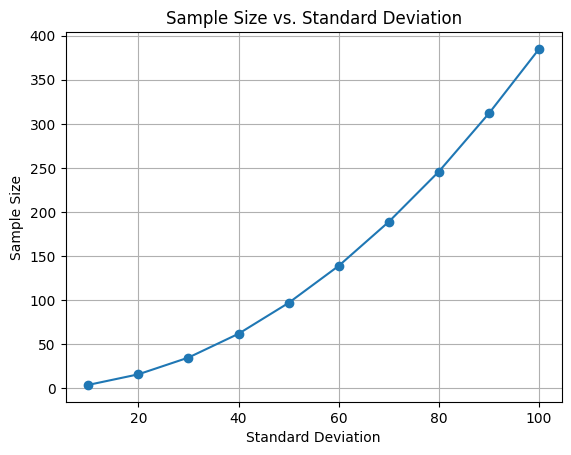

In [ ]:
def calculate_sample_size(std_dev):
    return math.ceil((z_value ** 2 * std_dev ** 2) / margin_of_error ** 2)


confidence_level = 0.95
margin_of_error = 10
z_value = 1.96
std_dev_range = range(10, 101, 10)


sample_sizes = [calculate_sample_size(std_dev) for std_dev in std_dev_range]


data = {'Standard Deviation': std_dev_range, 'Sample Size': sample_sizes}
df = pd.DataFrame(data)


plt.plot(df['Standard Deviation'], df['Sample Size'], marker='o')
plt.title('Sample Size vs. Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Sample Size')
plt.grid(True)
plt.show()


# Sample Size Estimation for Proportion: One Sample

**The bank aims to determine the required sample size to estimate this proportion with a 95% confidence level and a margin of error of 2%. The historical data suggests that approximately 30% of transactions are high-value. What sample size is needed to achieve the desired precision in the estimate?**

In [ ]:
confidence_level = 0.95
margin_of_error = 0.02
estimated_proportion = 0.3

z_value = 1.96

sample_size_proportion = ((z_value ** 2) * estimated_proportion * (1 - estimated_proportion)) / (margin_of_error ** 2)

sample_size_proportion = math.ceil(sample_size_proportion)
print(f"The required Sample size is {sample_size_proportion}")

The required Sample size is 2017


# Sample Size Estimation for Proportion: Two Sample

**Airtel Payments Bank and Amazon Pay are keen to compare the proportions of their respective UPI transactions. The banks want to detect a significant difference with a 90% confidence level and a minimum detectable difference of 5% in proportions. The pooled estimated proportion from preliminary data is around 40%. What is the required sample size for each bank to achieve the desired level of confidence and precision in comparing their transaction proportions?**

In [ ]:
# Hypothetical values
confidence_level = 0.90
min_detectable_difference = 0.05
pooled_proportion = 0.4

z_value_1 = 1.645
z_value_2 = 1.645


sample_size_comparison = (2 * (z_value_1 + z_value_2) ** 2 * pooled_proportion * (1 - pooled_proportion)) / min_detectable_difference ** 2


sample_size_comparison = math.ceil(sample_size_comparison)
print(f"The required Sample size is {sample_size_comparison}")

The required Sample size is 2079


# Thank You